# Visualizations 2D
---

## 00. Imports

In [1]:
import sys
sys.path.append("../")

In [2]:
from src.decision_tree import TreeClassifier
from src.random_forest import RandomForestClassifier

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier as SKRandomForestClassifier

from matplotlib import cm
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

## 01. Settings

In [4]:
# number of samples in the data set
N_SAMPLES = 1000
# ratio between training and test sets
TEST_SIZE = 0.2
# boundary of the graph
GRID_X_START = -1.5
GRID_X_END = 1.5
GRID_Y_START = -1.5
GRID_Y_END = 1.5

## 02. Support functions

In [62]:
def display_2D_data_set(x: np.array) -> None:
    plt.style.use('dark_background')
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.scatter(x[:, 0], x[:, 1], c=y_train.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='white');
    plt.show()

In [66]:
def display_classification_areas(
    model, 
    title: str, 
    x_start: float = GRID_X_START,
    x_end: float = GRID_X_END,
    y_start: float = GRID_Y_START,
    y_end: float = GRID_Y_END,
    output_path: str = None
) -> None:
    grid = np.mgrid[x_start:x_end:100j,y_start:y_end:100j]
    grid_2d = grid.reshape(2, -1).T
    X, Y = grid

    prediction_probs = model.predict(grid_2d)
    
    plt.style.use('dark_background')
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.contourf(X, Y, prediction_probs.reshape(100, 100), alpha = 0.7, cmap=cm.Spectral)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='white')
    plt.show()
    if output_path:
        plt.savefig(output_path)

## 03. Circles - Test case

### 03.01. Create artificial dataset

In [67]:
X, y = make_circles(n_samples=N_SAMPLES, factor=.3, noise=.10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

### 03.02. Take a look

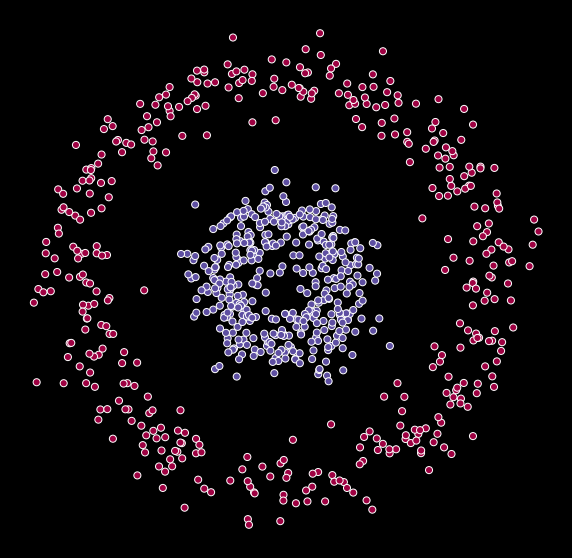

In [68]:
display_2D_data_set(X_train)

### 03.03. Single Decision Tree

In [69]:
tree_classifier = TreeClassifier(max_depth=5, min_samples_split=10)
tree_classifier.fit(X_train, y_train)

In [70]:
y_pred = tree_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.2f}%".format(acc * 100))

Accuracy: 97.50%


### 03.04. Visualizations Predictions

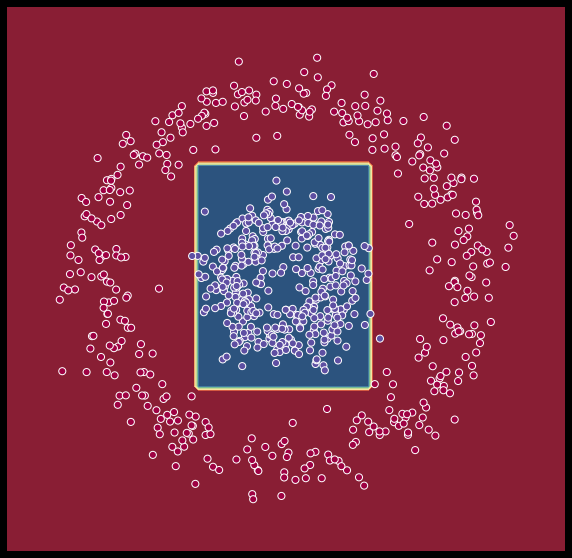

In [71]:
display_classification_areas(tree_classifier, "Classification areas for Single Decision Tree")

## 04. Moons - Test case

### 04.01. Create artificial dataset

In [72]:
X, y = make_moons(n_samples=N_SAMPLES, noise=.10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

### 04.02. Take a look

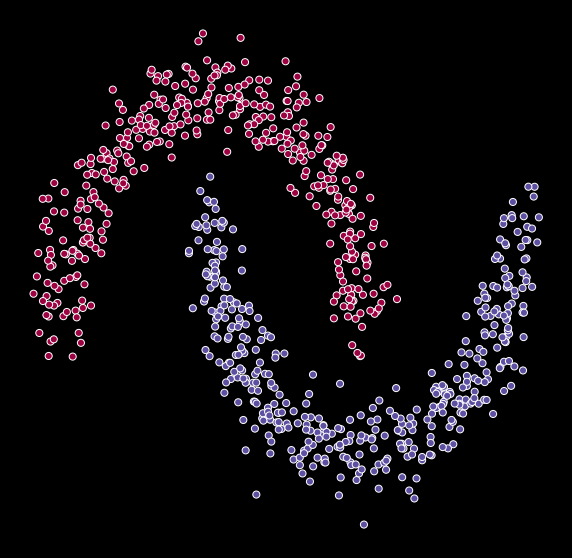

In [73]:
display_2D_data_set(X_train)

### 04.03. Single Decision Tree

In [74]:
tree_classifier = TreeClassifier(max_depth=5, min_samples_split=10)
tree_classifier.fit(X_train, y_train)

In [75]:
y_pred = tree_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.2f}%".format(acc * 100))

Accuracy: 94.50%


### 04.04. Visualizations Predictions

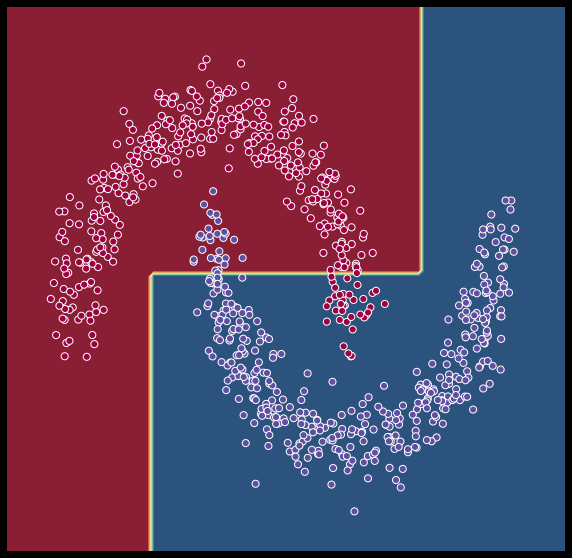

In [76]:
display_classification_areas(
    tree_classifier, 
    "Classification areas for Single Decision Tree", 
    x_end=2.5, y_start=-1.0
)

### 04.05. Random Forest

In [77]:
rf_classifier = RandomForestClassifier(n_estimators=100, fraction=0.6, max_depth=10, min_samples_split=5)
rf_classifier.fit(X_train, y_train)

In [78]:
y_pred = rf_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.2f}%".format(acc * 100))

Accuracy: 99.50%


## 04.06. Visualizations Predictions

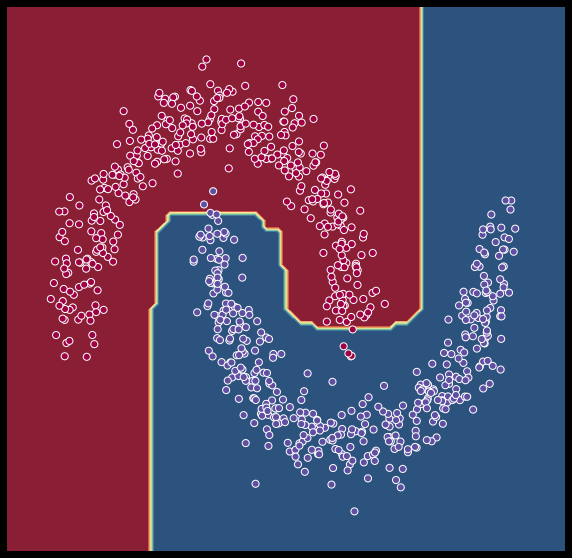

In [79]:
display_classification_areas(
    rf_classifier, 
    "Classification areas for Random Forest", 
    x_end=2.5, y_start=-1.0
)

In [80]:
X1, y1 = make_moons(n_samples=N_SAMPLES, noise=.10)
X2, y2 = make_moons(n_samples=N_SAMPLES, noise=.10)
X2 = - X2 + np.array([1.0, 2.0])
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))
X = np.flip(X, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

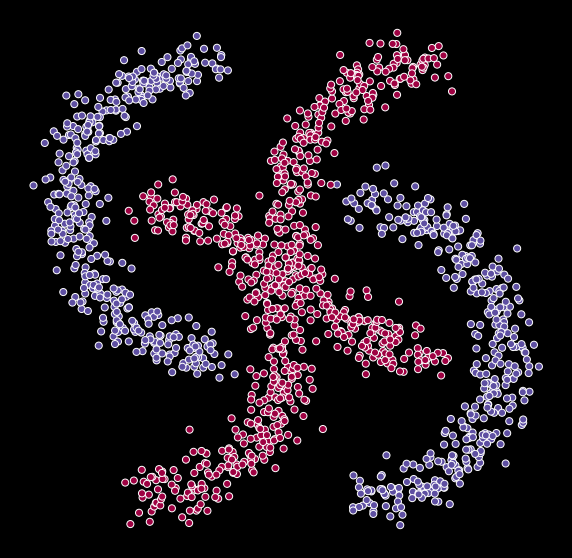

In [81]:
display_2D_data_set(X_train)

In [82]:
tree_classifier = TreeClassifier(max_depth=10, min_samples_split=20)
tree_classifier.fit(X_train, y_train)

In [83]:
y_pred = tree_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.2f}%".format(acc * 100))

Accuracy: 99.75%


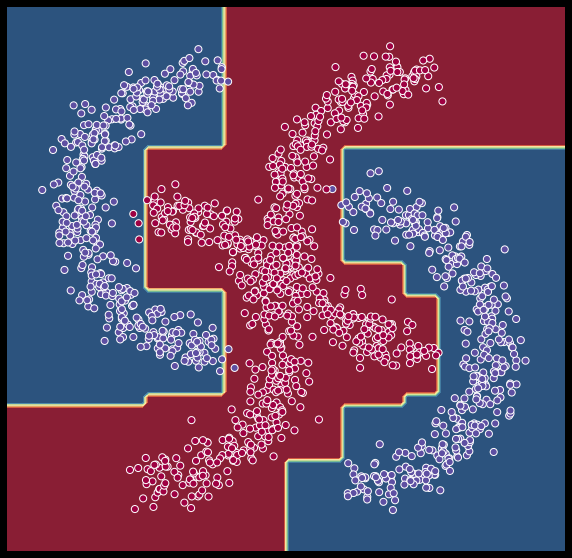

In [84]:
display_classification_areas(
    tree_classifier, 
    "Classification areas for Single Decision Tree", 
    x_start=-1.0, x_end=3.0, y_start=-1.5, y_end=2.5
)